In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from decimal import Decimal
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
path =r"C:/Users/axg1272/Documents/Data/John's Requests/Transfer Business Experiment for Admission"

In [3]:
path

"C:/Users/axg1272/Documents/Data/John's Requests/Transfer Business Experiment for Admission"

In [116]:
dataset = pd.read_excel(path + "/XFR_ADBU_DATA_REboot2_v.13.xlsx", sheet_name="AGG_Pop", 
                     index_col=False)

In [117]:
dataset.head()

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,GRADES
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,0,FAIL,PASS,0,NaN,NaN,NaN,NaN,NaN,"''=IF(AG2= ""A+"", ""A"",IF(AG2=""A"",""A"",IF(AG2=""A-..."
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,NaN
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,"""""""=IF(W2=0,0,IF(W2=""A"",""PASS"",IF(W2=""A+"", ""PA..."
3,50480064,2158-50480064,2158,Female,1,5125.0,2016.0,Y,Y,62342.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,50480105,2158-50480105,2158,Female,0,98414.0,2016.0,Y,Y,62342.0,...,0,PASS,PASS,PASS,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
dataset.drop(columns=['GRADES','Unnamed: 64', 'Unnamed: 65',
                      'Unnamed: 66','Unnamed: 67','Unnamed: 68'],
            inplace=True)

In [119]:
dataset["URM"]=0
dataset.loc[dataset['ETH'] == "American Indian/Alaska Native", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Black/African American", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Hispanic/Latino", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Native Hawaiian/Other Pacific Islander", 'URM'] = 1
dataset.loc[dataset['ETH'] == "Two or More Races", 'URM'] = 1

In [8]:
dataset.head()

,ID,XFR_BUS_UNIQUE_ID,ADMT_TERM,GENDER,FGEN,IM_EFC,AY,PROFILE,FAFSA,COA,...,MAS202_5_point_Scale,MAS202_FULL_Scale,FIN302_GRADE,FIN302_5_point_Scale,FIN302_FULL_Scale,MTH 161 Pass Fail,MAS 201PASS FAIL,MAS 202 PASS FAIL,FIN 302 Pass FAIL,URM
0,50432885,2158-50432885,2158,Male,0,164603.0,2016.0,Y,Y,62342.0,...,C,2,,,,0,FAIL,PASS,0,0
1,50457667,2158-50457667,2158,Female,0,NaN,NaN,N,N,NaN,...,A,4,A-,A,4,0,PASS,PASS,PASS,0
2,50475188,2158-50475188,2158,Male,0,NaN,NaN,N,N,NaN,...,B,3,A-,A,4,0,PASS,PASS,PASS,0
3,50480064,2158-50480064,2158,Female,1,5125.0,2016.0,Y,Y,62342.0,...,,,,,,0,0,0,0,1
4,50480105,2158-50480105,2158,Female,0,98414.0,2016.0,Y,Y,62342.0,...,B,3.33,B,B,3,0,PASS,PASS,PASS,1


In [120]:
#For Yr 1 aggregate persistence
dataset2 = dataset.loc[dataset['ADMT_TERM']<2178]
#For Yr 2 aggregate persistence
dataset3 = dataset.loc[dataset['ADMT_TERM']<2168]

In [10]:
persistyr1_table = dataset2.pivot_table(index=["COMBO_ADMIT","URM"],values=["ID"],
                       columns=['PERSIST_YR1'], aggfunc=[#np.mean,
                           len],margins=True, margins_name= 'Total',fill_value=0)

persistyr1_table.div( persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len             
                   ID             
PERSIST_YR1       0.0   1.0  Total
COMBO_ADMIT URM                   
NEW_UGBU    0    10.0  90.0  100.0
            1     6.0  94.0  100.0
XFR_ADBU    0    12.0  88.0  100.0
            1    14.0  86.0  100.0
XFR_UGBU    0     6.0  94.0  100.0
            1     7.0  93.0  100.0
Total             9.0  91.0  100.0

In [11]:
persistyr1_table = dataset2.pivot_table(index=["COMBO_ADMIT","FGEN"],values=["ID"],
                       columns=['PERSIST_YR1'], aggfunc=[#np.mean,
                           len],margins=True, margins_name= 'Total',fill_value=0)

persistyr1_table.div( persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len             
                    ID             
PERSIST_YR1        0.0   1.0  Total
COMBO_ADMIT FGEN                   
NEW_UGBU    0      9.0  91.0  100.0
            1     10.0  90.0  100.0
XFR_ADBU    0     15.0  85.0  100.0
            1      7.0  93.0  100.0
XFR_UGBU    0      7.0  93.0  100.0
            1      6.0  94.0  100.0
Total              9.0  91.0  100.0

In [12]:
persistyr1_table = dataset2.pivot_table(index=["COMBO_ADMIT","NDRK7"],values=["ID"],
                       columns=['PERSIST_YR1'], aggfunc=[#np.mean,
                           len],margins=True, margins_name= 'Total',fill_value=0)

persistyr1_table.div( persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len              
                     ID              
PERSIST_YR1         0.0    1.0  Total
COMBO_ADMIT NDRK7                    
NEW_UGBU    0       9.0   91.0  100.0
            1       0.0  100.0  100.0
XFR_ADBU    0      12.0   88.0  100.0
            1      17.0   83.0  100.0
XFR_UGBU    0       7.0   93.0  100.0
            1       0.0  100.0  100.0
Total               9.0   91.0  100.0

In [13]:
bu_dataset2 = dataset2.loc[dataset2['PERSIST_YR1']==1]

In [14]:
bu_persistyr1_table = bu_dataset2.pivot_table(index=["COMBO_ADMIT"],values=["ID"],
                       columns=['PERSIST_BU_YR1'], aggfunc=[#np.mean,
                           len],margins=True, margins_name= 'Total',fill_value=0)

bu_persistyr1_table.div( bu_persistyr1_table.iloc[:,-1], axis=0 ).mul(100).round(0)

len              
                  ID              
PERSIST_BU_YR1     0      1  Total
COMBO_ADMIT                       
NEW_UGBU         7.0   93.0  100.0
XFR_ADBU        59.0   41.0  100.0
XFR_UGBU         0.0  100.0  100.0
Total           11.0   89.0  100.0

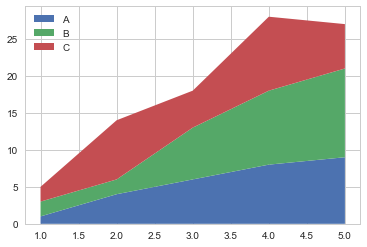

In [15]:
# Data
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Pct URM, FGEN, NDRK7, CC pie for transfers

No handles with labels found to put in legend.


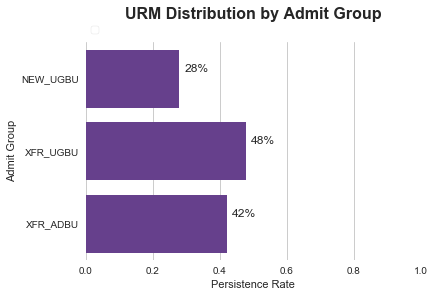

In [526]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="URM", y="COMBO_ADMIT", data=dataset,
            color="rebeccapurple", ci=None)

# Add a title
plt.title("URM Distribution by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/dist_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

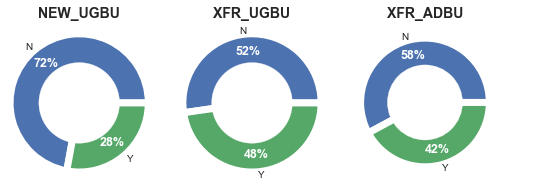

In [527]:
fig = plt.figure()

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
my_circle3=plt.Circle( (0,0), 0.7, color='white')

variable = "URM"
new_ugbu = dataset.loc[dataset['COMBO_ADMIT']=='NEW_UGBU'].groupby([variable])["FULL_TIME"].sum()
xfr_ugbu = dataset.loc[dataset['COMBO_ADMIT']=='XFR_UGBU'].groupby([variable])["FULL_TIME"].sum()
xfr_adbu = dataset.loc[dataset['COMBO_ADMIT']=='XFR_ADBU'].groupby([variable])["FULL_TIME"].sum()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
_, _, autotexts = ax1.pie(new_ugbu, labels=["N","Y"], radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle)
plt.title("NEW_UGBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

ax2 = fig.add_axes([.4, .0, .5, .5], aspect=1)
_, _, autotexts = ax2.pie(xfr_ugbu, labels=["N","Y"],radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle2)
plt.title("XFR_UGBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

ax3 = fig.add_axes([.8, .0, .5, .5], aspect=1)
_, _, autotexts = ax3.pie(xfr_adbu, labels=["N","Y"],radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle3)
plt.title("XFR_ADBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

plt.axis('equal')  

# Save graphic to specified path
plt.savefig(path + '/dist_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

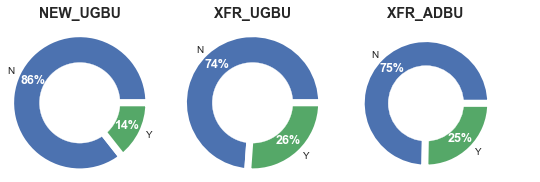

In [528]:
fig = plt.figure()

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
my_circle3=plt.Circle( (0,0), 0.7, color='white')

variable = "FGEN"
new_ugbu = dataset.loc[dataset['COMBO_ADMIT']=='NEW_UGBU'].groupby([variable])["FULL_TIME"].sum()
xfr_ugbu = dataset.loc[dataset['COMBO_ADMIT']=='XFR_UGBU'].groupby([variable])["FULL_TIME"].sum()
xfr_adbu = dataset.loc[dataset['COMBO_ADMIT']=='XFR_ADBU'].groupby([variable])["FULL_TIME"].sum()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
_, _, autotexts = ax1.pie(new_ugbu, labels=["N","Y"], radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle)
plt.title("NEW_UGBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

ax2 = fig.add_axes([.4, .0, .5, .5], aspect=1)
_, _, autotexts = ax2.pie(xfr_ugbu, labels=["N","Y"],radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle2)
plt.title("XFR_UGBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

ax3 = fig.add_axes([.8, .0, .5, .5], aspect=1)
_, _, autotexts = ax3.pie(xfr_adbu, labels=["N","Y"],radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle3)
plt.title("XFR_ADBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

plt.axis('equal')  

# Save graphic to specified path
plt.savefig(path + '/dist_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

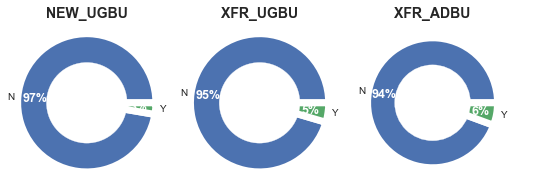

In [529]:
fig = plt.figure()

# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white', label="Test")
my_circle2=plt.Circle( (0,0), 0.7, color='white')
my_circle3=plt.Circle( (0,0), 0.7, color='white')

variable = "NDRK7"
new_ugbu = dataset.loc[dataset['COMBO_ADMIT']=='NEW_UGBU'].groupby([variable])["FULL_TIME"].sum()
xfr_ugbu = dataset.loc[dataset['COMBO_ADMIT']=='XFR_UGBU'].groupby([variable])["FULL_TIME"].sum()
xfr_adbu = dataset.loc[dataset['COMBO_ADMIT']=='XFR_ADBU'].groupby([variable])["FULL_TIME"].sum()

ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
_, _, autotexts = ax1.pie(new_ugbu, labels=["N","Y"], radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle)
plt.title("NEW_UGBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

ax2 = fig.add_axes([.4, .0, .5, .5], aspect=1)
_, _, autotexts = ax2.pie(xfr_ugbu, labels=["N","Y"],radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle2)
plt.title("XFR_UGBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

ax3 = fig.add_axes([.8, .0, .5, .5], aspect=1)
_, _, autotexts = ax3.pie(xfr_adbu, labels=["N","Y"],radius = 1.2, wedgeprops={'linewidth':7, 'edgecolor':'white'},
                          autopct='%1.0f%%', pctdistance=.75, labeldistance=1.05)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight("bold")
    autotext.set_fontsize(12.5)
plt.gcf().gca().add_artist(my_circle3)
plt.title("XFR_ADBU", fontweight="bold", fontsize=14, loc="center", y=1.05)

plt.axis('equal')  

# Save graphic to specified path
plt.savefig(path + '/dist_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [530]:
dataset.loc[dataset['COMBO_ADMIT']=='NEW_UGBU'].groupby([variable])["FULL_TIME"].sum()

NDRK7
0    1483
1      41
Name: FULL_TIME, dtype: int64

In [531]:
dataset.loc[dataset['COMBO_ADMIT']=='XFR_UGBU'].groupby([variable])["FULL_TIME"].sum()

NDRK7
0    84
1     4
Name: FULL_TIME, dtype: int64

In [532]:
dataset.loc[dataset['COMBO_ADMIT']=='XFR_ADBU'].groupby([variable])["FULL_TIME"].sum()

NDRK7
0    168
1     10
Name: FULL_TIME, dtype: int64

In [533]:
#Persistence rates

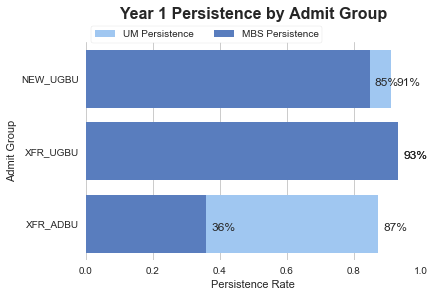

In [534]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", data=dataset2,
            label="UM Persistence", color="b", ci=None)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1", y="COMBO_ADMIT", data=dataset2,
            label="MBS Persistence", color="b", ci=None)

# Add a title
plt.title("Year 1 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
    
# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

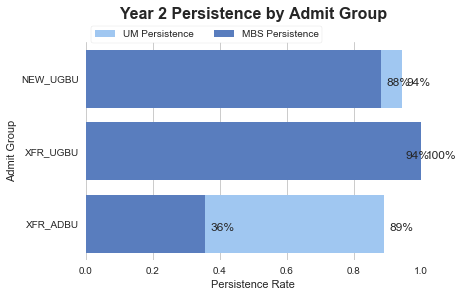

In [535]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot total UM persistence
sns.set_color_codes("pastel")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", data=dataset3,
            label="UM Persistence", color="b", ci=None)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", data=dataset3,
            label="MBS Persistence", color="b", ci=None)

# Add a title
plt.title("Year 2 Persistence by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
    
# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

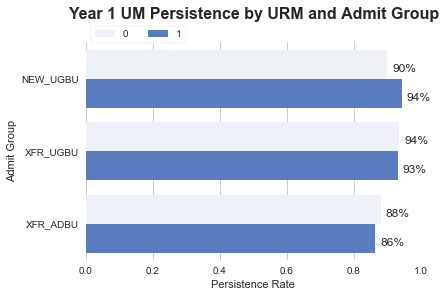

In [536]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="URM", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by URM and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

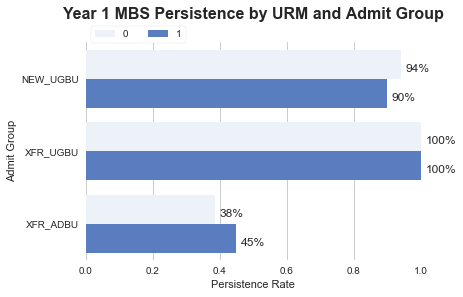

In [537]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="URM", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by URM and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

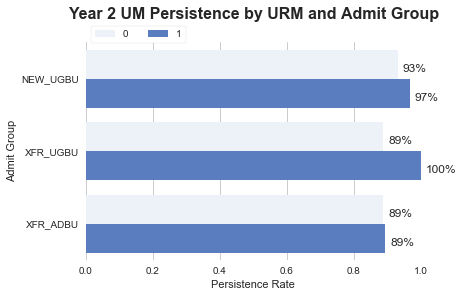

In [538]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="URM", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by URM and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

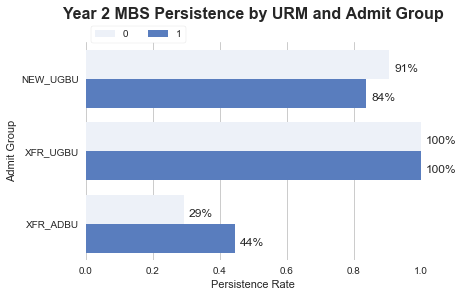

In [539]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="URM", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by URM and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

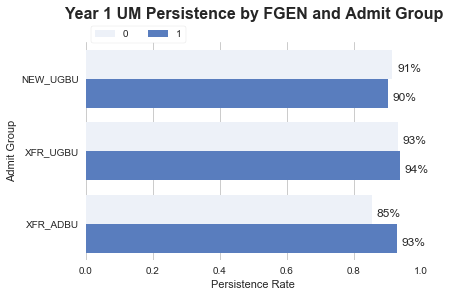

In [540]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="FGEN", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by FGEN and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

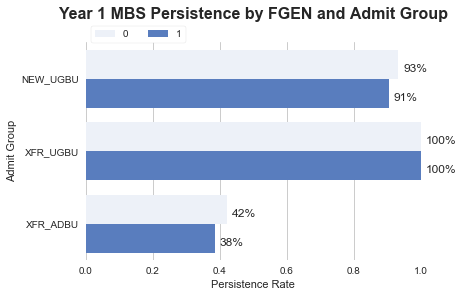

In [541]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="FGEN", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by FGEN and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

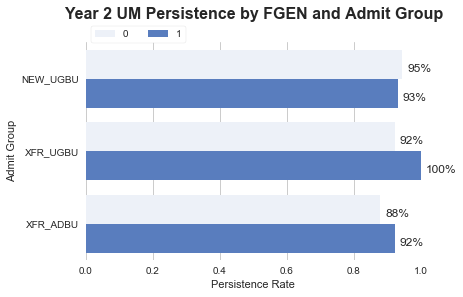

In [542]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="FGEN", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by FGEN and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

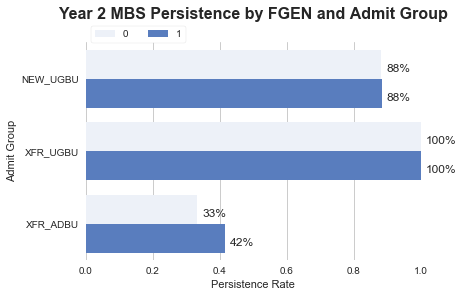

In [543]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="FGEN", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by FGEN and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

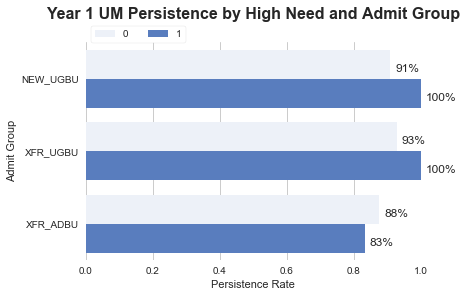

In [544]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="NDRK7", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by High Need and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

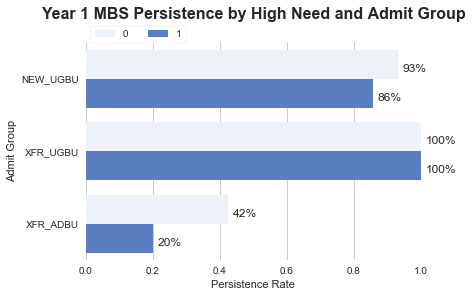

In [545]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="NDRK7", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by High Need and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

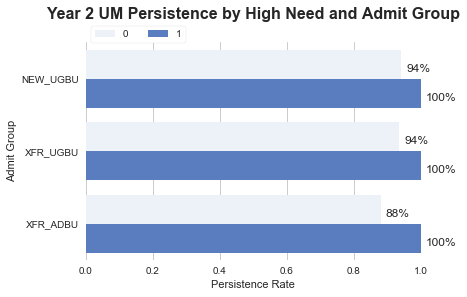

In [546]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="NDRK7", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by High Need and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

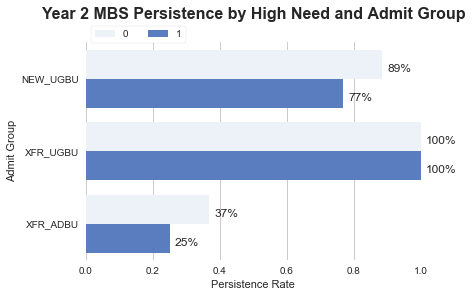

In [547]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="NDRK7", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by High Need and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

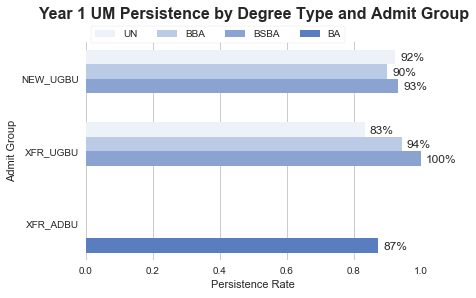

In [548]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="DEGREE_TYPE", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by Degree Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_degree_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

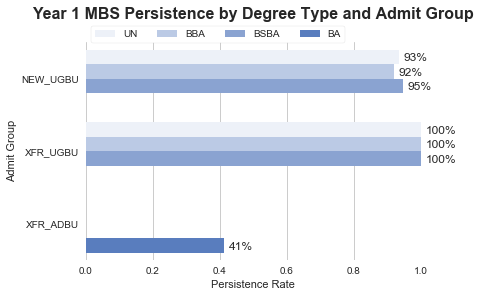

In [549]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="DEGREE_TYPE", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by Degree Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_degree_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

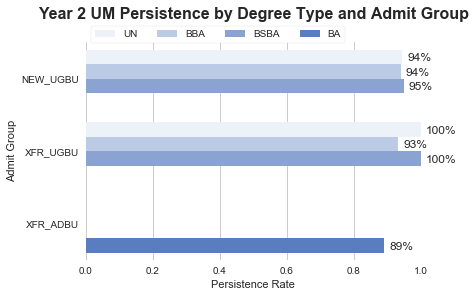

In [550]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="DEGREE_TYPE", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by Degree Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_degree_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

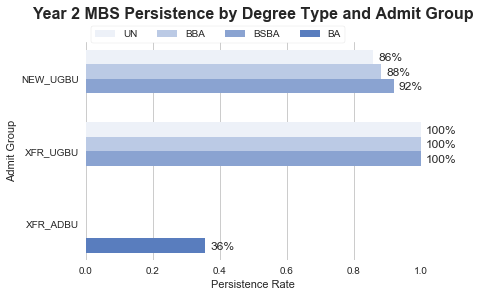

In [551]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="DEGREE_TYPE", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by Degree Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_degree_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

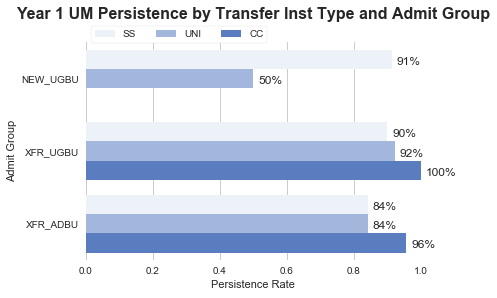

In [552]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="Transfer Inst Type", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by Transfer Inst Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_inst_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

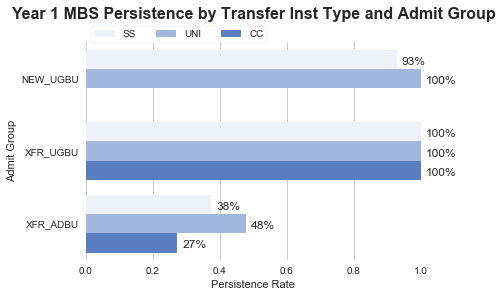

In [553]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="Transfer Inst Type", data=dataset2,
            color="b", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by Transfer Inst Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_inst_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

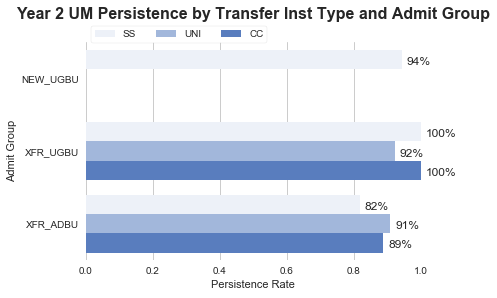

In [554]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="Transfer Inst Type", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by Transfer Inst Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_inst_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

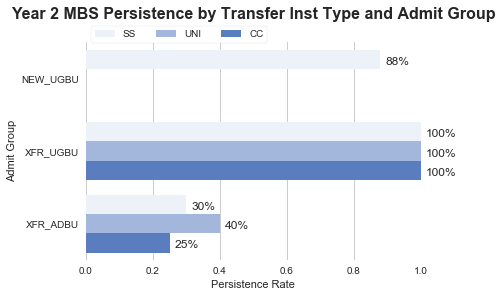

In [555]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="Transfer Inst Type", data=dataset3,
            color="b", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by Transfer Inst Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_inst_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

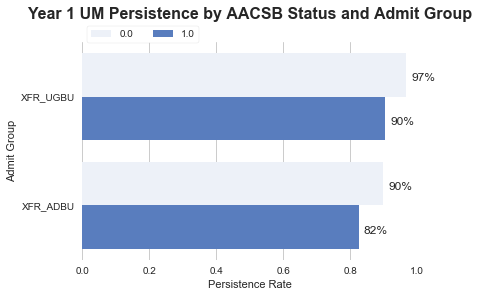

In [556]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="AACSB", data=dataset2.loc[dataset2['COMBO_ADMIT']!='NEW_UGBU'],
            color="b", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by AACSB Status and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.32),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_aacsb.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

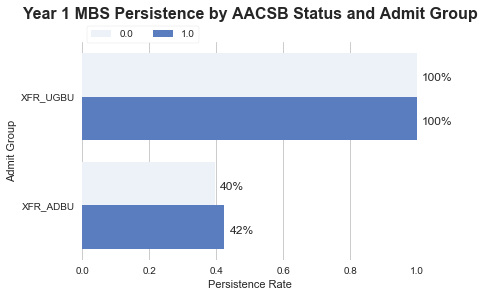

In [557]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="AACSB", data=dataset2.loc[dataset2['COMBO_ADMIT']!='NEW_UGBU'],
            color="b", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by AACSB Status and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.32),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_aacsb.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

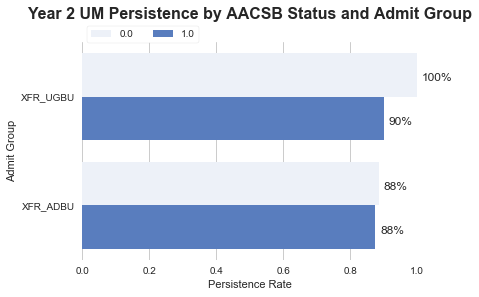

In [558]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="AACSB", data=dataset3.loc[dataset3['COMBO_ADMIT']!='NEW_UGBU'],
            color="b", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by AACSB Status and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.32),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_aacsb.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

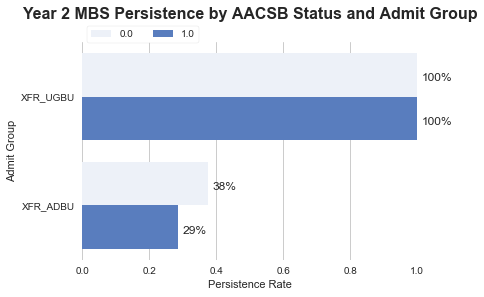

In [559]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="AACSB", data=dataset3.loc[dataset3['COMBO_ADMIT']!='NEW_UGBU'],
            color="b", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by AACSB Status and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.32),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_aacsb.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [560]:
#Persistence by Calc ready and for URM, FGEN, and NDRK7

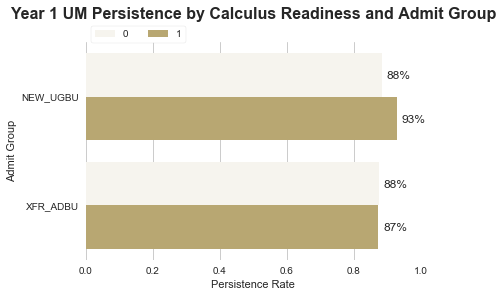

In [561]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[dataset2['COMBO_ADMIT']!='XFR_UGBU'],
            color="y", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_calc_ready.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

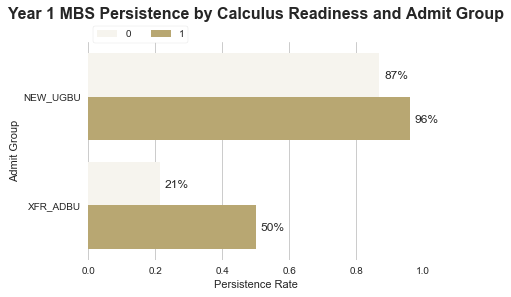

In [562]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[dataset2['COMBO_ADMIT']!='XFR_UGBU'],
            color="y", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_calc_ready.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

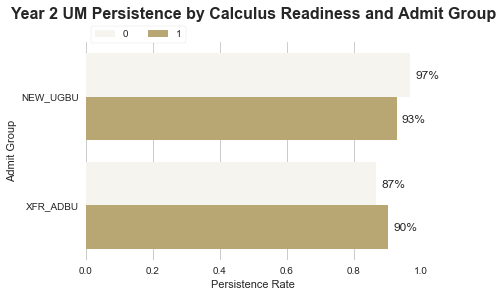

In [563]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[dataset3['COMBO_ADMIT']!='XFR_UGBU'],
            color="y", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_calc_ready.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

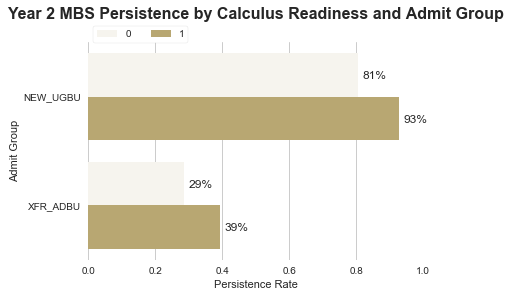

In [564]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[dataset3['COMBO_ADMIT']!='XFR_UGBU'],
            color="y", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by Calculus Readiness and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_calc_ready.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

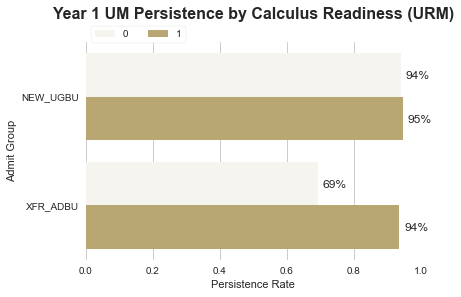

In [565]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU')
                                                                                  & (dataset2['URM']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by Calculus Readiness (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_calc_ready_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

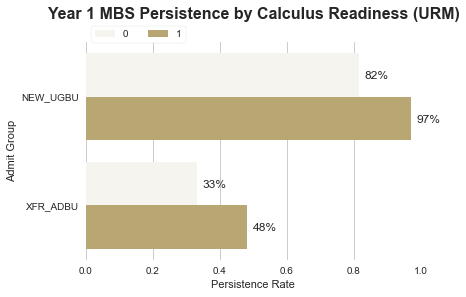

In [566]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU')
                                                                                                & (dataset2['URM']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by Calculus Readiness (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_calc_ready_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

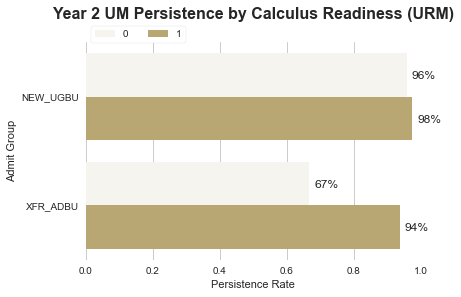

In [567]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU')
                                                                                        & (dataset3['URM']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by Calculus Readiness (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_calc_ready_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

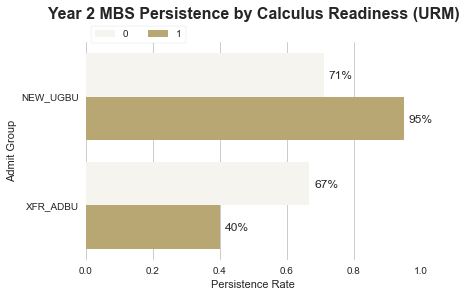

In [568]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU')
                                                                                                & (dataset3['URM']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by Calculus Readiness (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_calc_ready_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

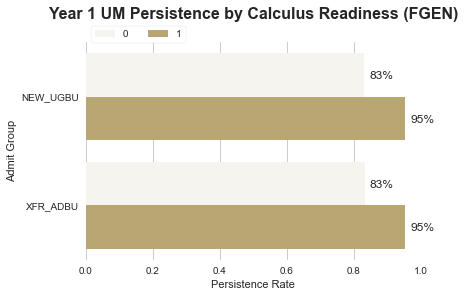

In [569]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU')
                                                                                  & (dataset2['FGEN']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by Calculus Readiness (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_calc_ready_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

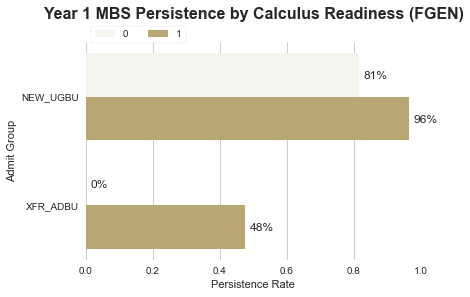

In [570]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU')
                                                                                                & (dataset2['FGEN']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by Calculus Readiness (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_calc_ready_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

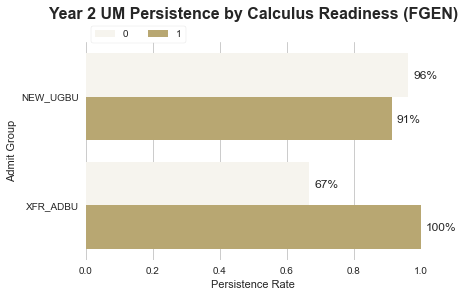

In [571]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU')
                                                                                        & (dataset3['FGEN']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by Calculus Readiness (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_calc_ready_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

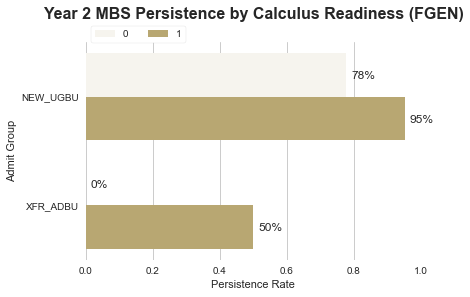

In [572]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU')
                                                                                                & (dataset3['FGEN']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by Calculus Readiness (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_calc_ready_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

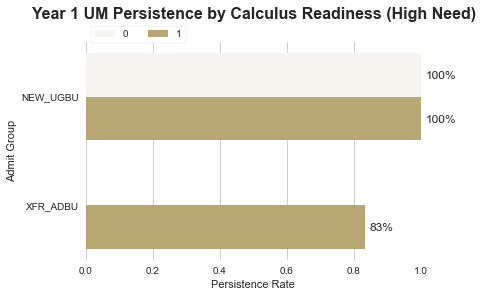

In [573]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU')
                                                                                  & (dataset2['NDRK7']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by Calculus Readiness (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr1_persistence_calc_ready_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

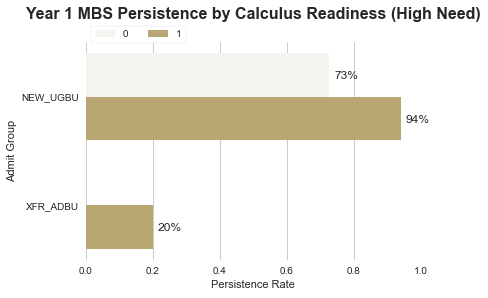

In [574]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU')
                                                                                                & (dataset2['NDRK7']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by Calculus Readiness (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr1_persistence_calc_ready_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

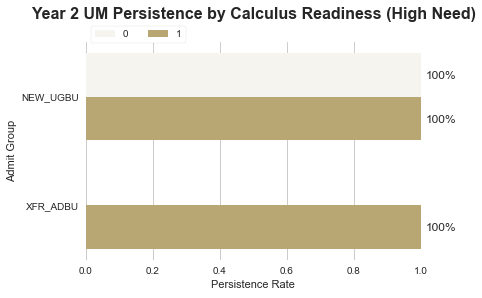

In [575]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU')
                                                                                        & (dataset3['NDRK7']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by Calculus Readiness (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/um_yr2_persistence_calc_ready_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

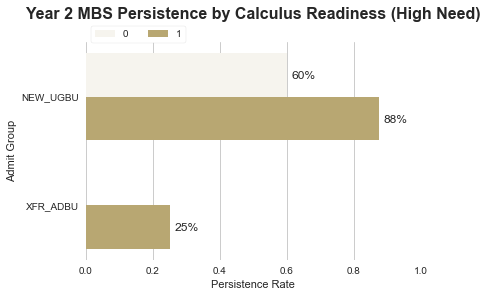

In [576]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="Calc Ready", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU')
                                                                                                & (dataset3['NDRK7']==1)],
            color="y", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by Calculus Readiness (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_yr2_persistence_calc_ready_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [577]:
#Calculus ready fr vs xfr vs adbu
#By URM, FGEN, NDRK7, CC

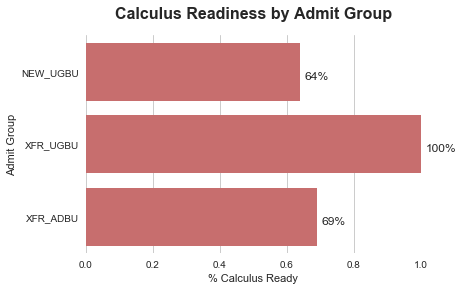

In [578]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

# Load the example car crash dataset
#crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot MBS persistence
sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", data=dataset2,
            label="MBS Persistence", color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.05)

# Add a legend and informative axis label
#ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.6),
                xytext=(5, 10), textcoords='offset points', va='center')
    
# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_ready.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

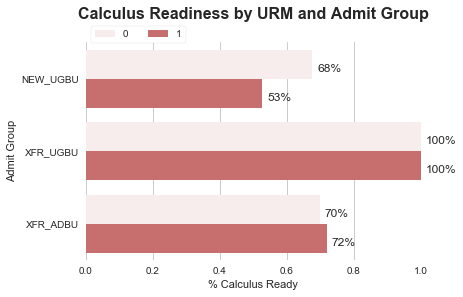

In [579]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", hue="URM", data=dataset,
            color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by URM and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_ready_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

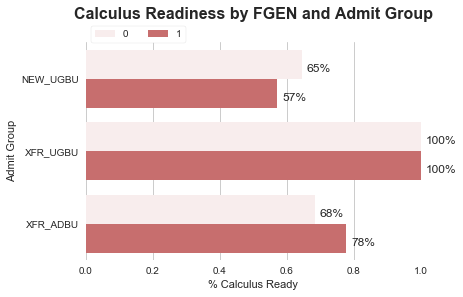

In [580]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", hue="FGEN", data=dataset,
            color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by FGEN and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_ready_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

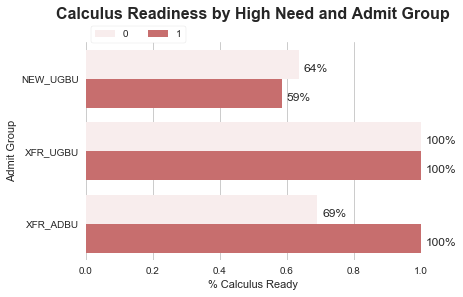

In [581]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", hue="NDRK7", data=dataset,
            color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by High Need and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.4),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_ready_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

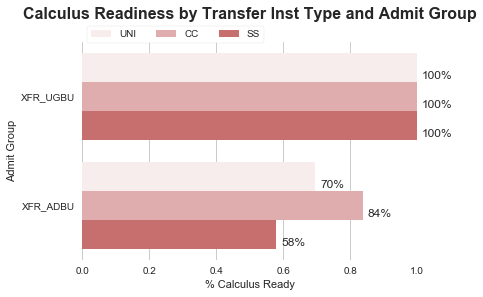

In [582]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", hue="Transfer Inst Type", data=dataset.loc[dataset['COMBO_ADMIT']!='NEW_UGBU'],
            color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by Transfer Inst Type and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_ready_inst_type.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

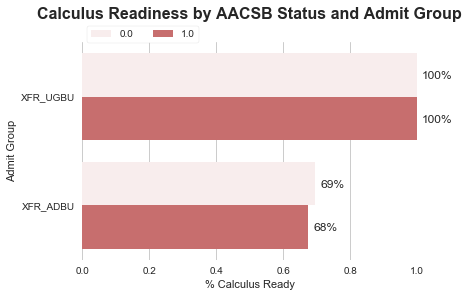

In [583]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="Calc Ready", y="COMBO_ADMIT", hue="AACSB", data=dataset.loc[dataset['COMBO_ADMIT']!='NEW_UGBU'],
            color="r", ci=None)

# Add a title
plt.title("Calculus Readiness by AACSB Status and Admit Group", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=3, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="% Calculus Ready")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.3),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/mbs_calculus_ready_aacsb.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

In [584]:
#Calculus completion and progress into BU

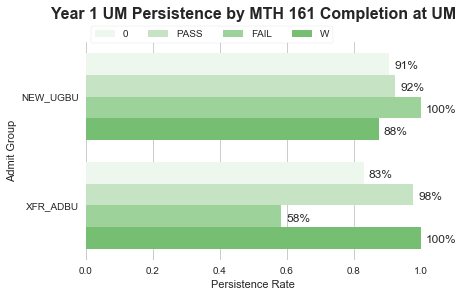

In [585]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[dataset2['COMBO_ADMIT']!='XFR_UGBU'],
            color="g", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr1.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

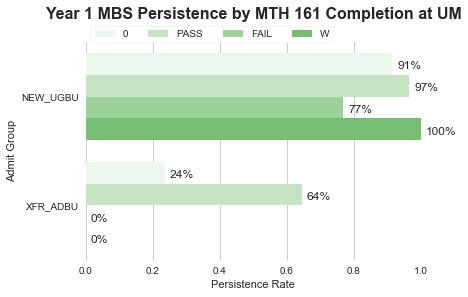

In [586]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[dataset2['COMBO_ADMIT']!='XFR_UGBU'],
            color="g", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr1.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

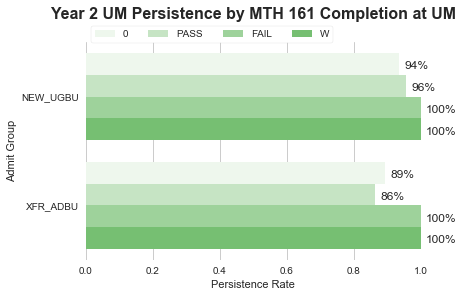

In [587]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[dataset3['COMBO_ADMIT']!='XFR_UGBU'],
            color="g", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr2.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

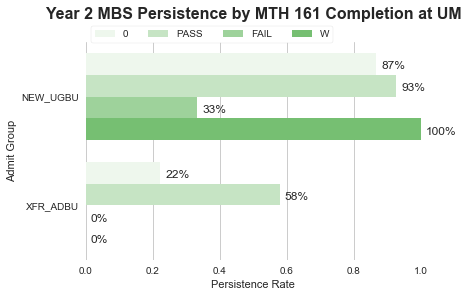

In [588]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[dataset3['COMBO_ADMIT']!='XFR_UGBU'],
            color="g", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by MTH 161 Completion at UM", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr2.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

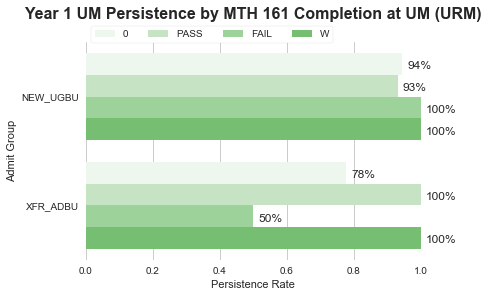

In [589]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset2['URM']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by MTH 161 Completion at UM (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr1_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

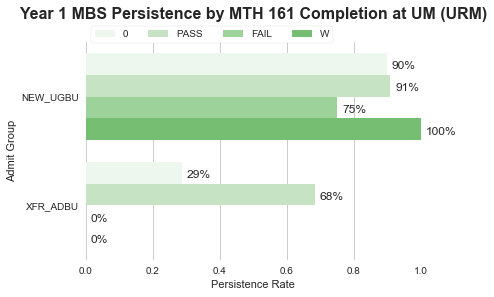

In [590]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset2['URM']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by MTH 161 Completion at UM (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr1_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

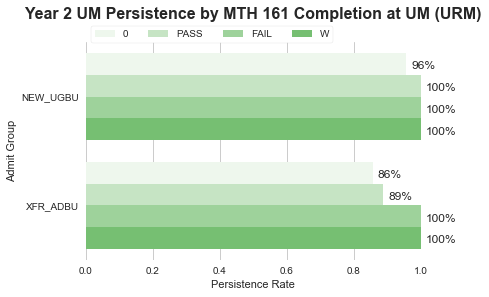

In [591]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset3['URM']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by MTH 161 Completion at UM (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr2_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

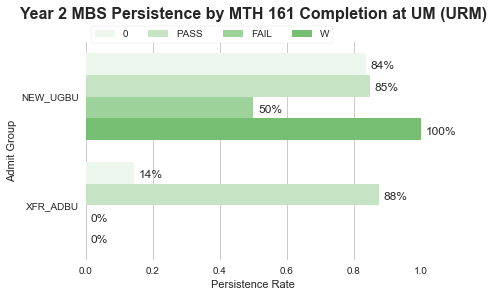

In [592]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset3['URM']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by MTH 161 Completion at UM (URM)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr2_urm.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

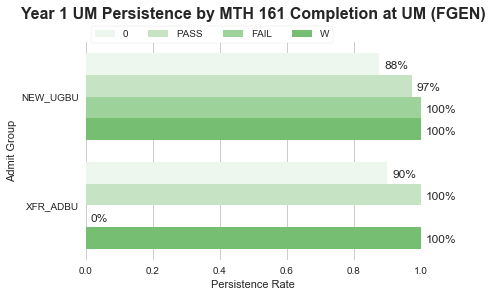

In [593]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset2['FGEN']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by MTH 161 Completion at UM (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr1_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

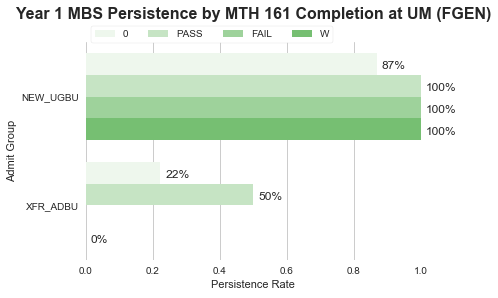

In [594]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset2['FGEN']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by MTH 161 Completion at UM (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr1_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

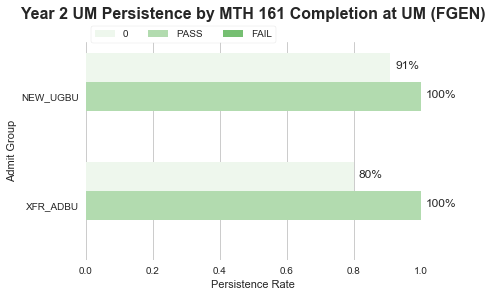

In [595]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset3['FGEN']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by MTH 161 Completion at UM (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr2_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

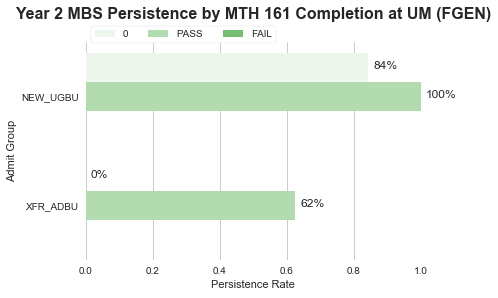

In [596]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset3['FGEN']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by MTH 161 Completion at UM (FGEN)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.21),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr2_fgen.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

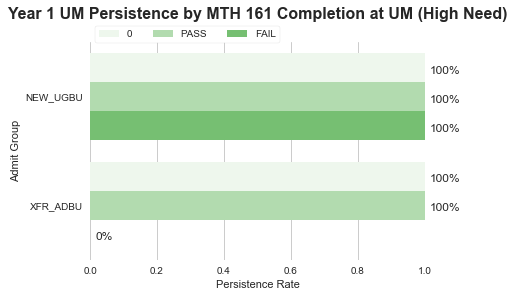

In [597]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR1", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset2['NDRK7']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 1 UM Persistence by MTH 161 Completion at UM (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr1_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

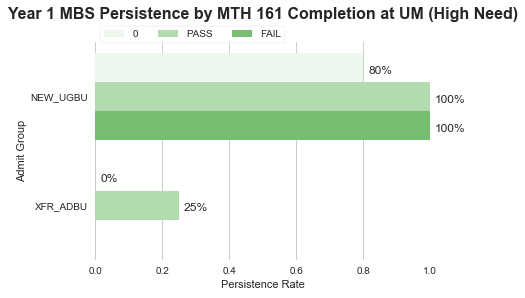

In [598]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR1_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset2.loc[(dataset2['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset2['NDRK7']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 1 MBS Persistence by MTH 161 Completion at UM (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.25),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr1_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

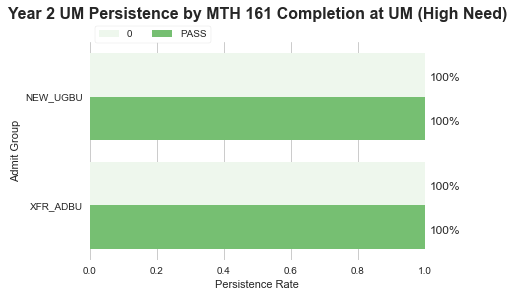

In [599]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_YR2_DEC_N", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset3['NDRK7']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 2 UM Persistence by MTH 161 Completion at UM (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.32),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_um_yr2_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures

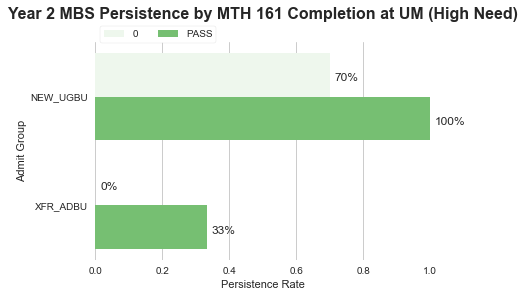

In [600]:
# Initialize the matplotlib figure
f, ax = plt.subplots()

sns.set_color_codes("muted")
sns.barplot(x="PERSIST_BU_YR2_OF_PERSIST", y="COMBO_ADMIT", hue="MTH 161 Pass Fail", data=dataset3.loc[(dataset3['COMBO_ADMIT']!='XFR_UGBU') 
                                                                                                       & (dataset3['NDRK7']==1)],
            color="g", ci=None)

# Add a title
plt.title("Year 2 MBS Persistence by MTH 161 Completion at UM (High Need)", fontweight="bold", fontsize=16, loc="center", y=1.08)

# Add a legend and informative axis label
ax.legend(ncol=4, loc="upper left", frameon=True, bbox_to_anchor=(0,1.1))
ax.set(xlim=(0, 1), ylabel="Admit Group",
       xlabel="Persistence Rate")
sns.despine(left=True, bottom=True)


# Iterate through the list of axes' patches
for p in ax.patches:
    ax.annotate("%.0f%s" % (p.get_width()*100,'%'), (p.get_x() + p.get_width(), p.get_y() + 0.32),
                xytext=(5, 10), textcoords='offset points', va='center')

# Save graphic to specified path
plt.savefig(path + '/calculus_completion_mbs_yr2_ndrk7.jpg', dpi=300, format='jpg', frameon=False, bbox_inches='tight') # use format='svg' or 'pdf' for vectorial pictures